In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact_manual
import ipywidgets as wd

from os import system

In [2]:
import matplotlib.text as mtext

class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, r'\bf{' + orig_handle + '}', usetex=False, **self.text_props)
        handlebox.add_artist(title)
        return title

# Guillier et al. model (2020)

In [3]:
def Guillier2020(Temp):
    '''Other Constants in the model'''
    LOG10DREF = 2.3
    TREF = 4.0 
    ZT = 29.1
    
    log10D = lambda T : LOG10DREF - ((T - TREF)/ZT)**2      
    D = np.power(10.0,log10D(Temp))
    
    decayRate = np.log(10.0)/D #hour^-1
    
    if type(Temp) is float:
        print("Guillier et al. (2020)")
        print("Time to 1-log reduction [h] = {0:.4E} ".format(D))
        print("                        [d] = {0:.4E} ".format(D/24))
        print("")
        print("Time to 6-log reduction [h] = {0:.4E} ".format(D*6))
        print("                        [d] = {0:.4E} ".format(D*6/24))
        
        print("decay Rate [1/h] = {0:.2E} ".format(decayRate))
        print("           [1/d] = {0:.2E} ".format(decayRate*24))
        print("           [1/s] = {0:.4E} ".format(decayRate/3600))
        
    return decayRate/3600

In [4]:
def Bivins2020(Temp):
    SLOPE = 0.0612
    YINTERCEPT = -0.978
    
    log10K = lambda T : SLOPE*T + YINTERCEPT
    decayRate = np.power(10.0,log10K(Temp)) #day^-1
    
    if type(Temp) is float:      
        print("Bivins et al. (2020)")
        print("decay Rate [1/h] = {0:.2E} ".format(decayRate/24))
        print("           [1/d] = {0:.2E} ".format(decayRate))
        print("           [1/s] = {0:.4E} ".format(decayRate/86400))
    
    return decayRate/86400

In [5]:
def Silverman2020(Temp):
    SLOPE = 0.065
    YINTERCEPT = -1.66
    
    log10K = lambda T : SLOPE*T + YINTERCEPT
    decayRate = np.power(10.0,log10K(Temp)) #day^-1
    
    if type(Temp) is float:      
        print("Silverman et Boehm (2020)")
        print("decay Rate [1/h] = {0:.2E} ".format(decayRate/24))
        print("           [1/d] = {0:.2E} ".format(decayRate))
        print("           [1/s] = {0:.4E} ".format(decayRate/86400))
    
    return decayRate/86400

In [6]:
def AhmedRNA2020(Temp):
    SLOPE = 0.016
    YINTERCEPT = -1.16
    
    log10K = lambda T : SLOPE*T + YINTERCEPT
    decayRate = np.power(10.0,log10K(Temp)) #day^-1
    
    if type(Temp) is float:      
        print("Ahmed et al. -RNA- (2020)")
        print("decay Rate [1/h] = {0:.2E} ".format(decayRate/24))
        print("           [1/d] = {0:.2E} ".format(decayRate))
        print("           [1/s] = {0:.4E} ".format(decayRate/86400))
    
    return decayRate/86400

In [7]:
def deOliveira2021():
    T = np.array([4,24])
    decayRate = {"RiverWater" : np.array([0.16,0.37])/86400.,
                 "WasteWater" : np.array([0.19,0.83])/86400.}  #d^-1>>s^-1
    return (T,decayRate)

In [8]:
def SalaComorera2021():
    T = np.array([4,20])
    decayRate = {"RiverWater" : np.array([0.61,1.01])/86400.,
                 "SeaWater" : np.array([1.07,2.02])/86400.}  #d^-1>>s^-1
    return (T,decayRate)

<ipython-input-9-10d79fad55a8>:68: RuntimeWarning: divide by zero encountered in true_divide
  rate = -(np.log10(1./100.)*np.log(10.0))/(t99*86400)


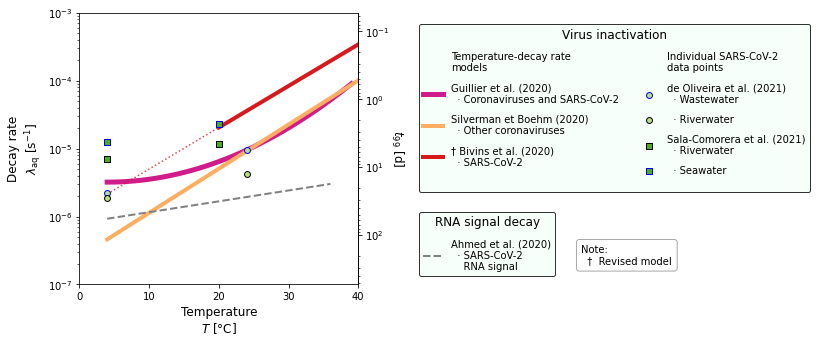

In [9]:
plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1)
lines={}

## Guillier 2020
T = np.arange(4,40,1)
lines['Guillier'] = ax.plot(T,Guillier2020(T),\
         label="Guillier et al. (2020)\n  · Coronaviruses and SARS-CoV-2",\
         c="#d01c8b",lw=5)

## Bivins 2020
T = np.arange(20,70,1)
T1 = np.arange(4,25,1)
lines['Bivins'] = ax.plot(T,Bivins2020(T),\
         label="\u2020 Bivins et al. (2020)\n  · SARS-CoV-2 ",\
         c="#d7191c",lw=4)
lines['Bivins_extrapol'] = ax.plot(T1,Bivins2020(T1),\
         c="#d7191c",lw=1.5,ls="dotted",alpha=0.8)

#BIVINSDATA = dict(T=np.array([20,50,70]),
#                  K=np.array([1.4,216,1440]))
#plt.scatter(BIVINSDATA['T'],BIVINSDATA['K']/86400,\
#           s=50,c='green',marker="o")

## Silverman 2020
T = np.arange(4,50,1)
lines['Silverman'] = ax.plot(T,Silverman2020(T),\
         label="Silverman et Boehm (2020)\n  · Other coronaviruses",\
         c="#fdae61",lw=4)

## Ahmed 2020
T = np.arange(4,37,1)
lines['AhmedRNA'] = ax.plot(T,AhmedRNA2020(T),\
         label="Ahmed et al. (2020)\n  · SARS-CoV-2\n    RNA signal",\
         c="gray",lw=2,ls="dashed")

## deOliveira 2021
lines['OliveriraWW'] = ax.scatter(deOliveira2021()[0],deOliveira2021()[1]['WasteWater'],\
            label="de Oliveira et al. (2021)\n  · Wastewater",\
            c="#b8e186",marker="o",s=35,zorder=4,edgecolors='blue')

lines['OliveriraRW'] = ax.scatter(deOliveira2021()[0],deOliveira2021()[1]['RiverWater'],\
            label="  · Riverwater",\
            c="#b8e186",marker="o",s=35,zorder=4,edgecolors='black')

## Sala-Comorera 2021
lines['SalaComoreraRW'] = ax.scatter(SalaComorera2021()[0],SalaComorera2021()[1]['RiverWater'],\
            label="Sala-Comorera et al. (2021)\n  · Riverwater",\
            c="#4dac26",marker="s",s=35,zorder=4,edgecolors='black')

lines['SalaComoreraSW'] = ax.scatter(SalaComorera2021()[0],SalaComorera2021()[1]['SeaWater'],\
            label="  · Seawater",\
            c="#4dac26",marker="s",s=35,zorder=4,edgecolors='blue')

## Miscelaneous
ax.set(yscale="log",ylim=[1.0E-7,1.0E-3])
font = {'size': 12}
ax.set_ylabel("Decay rate\n"+r"$\lambda_{\rm aq}$ [s$^{-1}$]",fontdict=font)
ax.set_xlabel("Temperature\n"+r"$T$ [°C]",fontdict=font)
ax.set(xlim=[0,40],xticks=[0,10,20,30,40])

## Secondary axis
def rate2t99(rate):
    t99 = -(np.log10(1./100.)*np.log(10.0))/(rate*86400)
    return t99

def t992rate(t99):
    rate = -(np.log10(1./100.)*np.log(10.0))/(t99*86400)
    return rate

secax = ax.secondary_yaxis('right', functions=(rate2t99, t992rate))
secax.set_ylabel(r'$t_{99}$'+' [d]',rotation=-90,fontdict=font,labelpad=15.0)

## Legend
whitebox = ax.scatter([1],[1],c="white",marker="o",s=1,alpha=0)

handles = [whitebox,
           lines['Guillier'][0],
           lines['Silverman'][0],
           lines['Bivins'][0],
           whitebox,
           whitebox,
           lines['OliveriraWW'],
           lines['OliveriraRW'],
           lines['SalaComoreraRW'],
           lines['SalaComoreraSW']]

labels = ["Temperature-decay rate\nmodels",
          lines['Guillier'][0].get_label(),
          lines['Silverman'][0].get_label(),
          lines['Bivins'][0].get_label(),
          "",
          "Individual SARS-CoV-2\ndata points",
          lines['OliveriraWW'].get_label(),
          lines['OliveriraRW'].get_label(),
          lines['SalaComoreraRW'].get_label(),
          lines['SalaComoreraSW'].get_label()]

leg1 = ax.legend(handles, labels, title="Virus inactivation",
           title_fontsize="large",
           loc="center left",ncol=2,bbox_to_anchor=(1.20,0.65),\
          edgecolor='k',facecolor='mintcream',labelspacing=1)

handles2 = [lines['AhmedRNA'][0]]
labels2  = [lines['AhmedRNA'][0].get_label()]

leg2 = ax.legend(handles2, labels2,title="RNA signal decay",
           bbox_to_anchor=(1.20,0.15),
           loc="center left",ncol=1,title_fontsize="large",\
          edgecolor='k',facecolor='mintcream',labelspacing=1)

ax.add_artist(leg1)
#ax.legend(loc="center left",ncol=1,bbox_to_anchor=(1.20,0.25),\
#          edgecolor='k',facecolor='mintcream',labelspacing=1)

#plt.tight_layout()

bbox = dict(boxstyle='round,pad=0.5,rounding_size=0.3', fc='w', alpha=1,ec='darkgrey')
information = '''Note:
  \u2020  Revised model'''
ax.text(1.80,0.075,information,bbox=bbox,transform=ax.transAxes,fontsize=10)

plt.show()

<ipython-input-17-c82cc820db3e>:70: RuntimeWarning: divide by zero encountered in true_divide
  rate = -(np.log10(1./100.)*np.log(10.0))/(t99*86400)


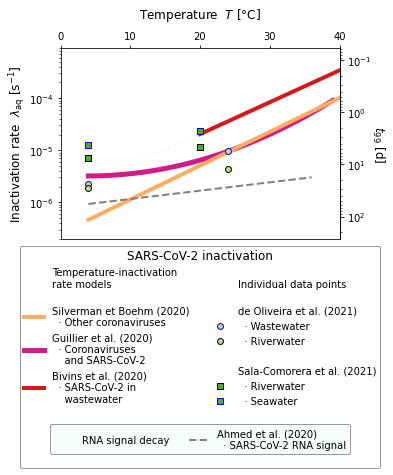

In [17]:
plt.figure(figsize=(5,3.5))
ax = plt.subplot(1,1,1)
lines={}

## Guillier 2020
T = np.arange(4,40,1)
lines['Guillier'] = ax.plot(T,Guillier2020(T),\
         label="Guillier et al. (2020)\n  · Coronaviruses\n    and SARS-CoV-2",\
         c="#d01c8b",lw=5)

## Bivins 2020
T = np.arange(20,70,1)
T1 = np.arange(4,25,1)
lines['Bivins'] = ax.plot(T,Bivins2020(T),\
         label="Bivins et al. (2020)\n  · SARS-CoV-2 in\n    wastewater",\
         c="#d7191c",lw=4)
lines['Bivins_extrapol'] = ax.plot(T1,Bivins2020(T1),\
         c="#d7191c",lw=1.5,ls="dotted",alpha=0.1)

#BIVINSDATA = dict(T=np.array([20,50,70]),
#                  K=np.array([1.4,216,1440]))
#plt.scatter(BIVINSDATA['T'],BIVINSDATA['K']/86400,\
#           s=50,c='green',marker="o")

## Silverman 2020
T = np.arange(4,50,1)
lines['Silverman'] = ax.plot(T,Silverman2020(T),\
         label="Silverman et Boehm (2020)\n  · Other coronaviruses",\
         c="#fdae61",lw=4)

## Ahmed 2020
T = np.arange(4,37,1)
lines['AhmedRNA'] = ax.plot(T,AhmedRNA2020(T),\
         label="Ahmed et al. (2020)\n  · SARS-CoV-2 RNA signal",\
         c="gray",lw=2,ls="dashed")

## deOliveira 2021
lines['OliveriraWW'] = ax.scatter(deOliveira2021()[0],deOliveira2021()[1]['WasteWater'],\
            label="  · Wastewater",\
            c="#b8e186",marker="o",s=35,zorder=4,edgecolors='blue')

lines['OliveriraRW'] = ax.scatter(deOliveira2021()[0],deOliveira2021()[1]['RiverWater'],\
            label="  · Riverwater",\
            c="#b8e186",marker="o",s=35,zorder=4,edgecolors='black')

## Sala-Comorera 2021
lines['SalaComoreraRW'] = ax.scatter(SalaComorera2021()[0],SalaComorera2021()[1]['RiverWater'],\
            label="  · Riverwater",\
            c="#4dac26",marker="s",s=35,zorder=4,edgecolors='black')

lines['SalaComoreraSW'] = ax.scatter(SalaComorera2021()[0],SalaComorera2021()[1]['SeaWater'],\
            label="  · Seawater",\
            c="#4dac26",marker="s",s=35,zorder=4,edgecolors='blue')

## Miscelaneous
ax.set(yscale="log",ylim=[2.0E-7,9.0E-4])
font = {'size': 12}
ax.set_ylabel("Inactivation rate  "+r"$\lambda_{\rm aq}$ [s$^{-1}$]",
              fontdict=font,labelpad=1.0)
ax.set_xlabel("Temperature  "+r"$T$ [°C]",
              fontdict=font,labelpad=13.0)
ax.set(xlim=[0,40],xticks=[0,10,20,30,40])

## Secondary axis
def rate2t99(rate):
    t99 = -(np.log10(1./100.)*np.log(10.0))/(rate*86400)
    return t99

def t992rate(t99):
    rate = -(np.log10(1./100.)*np.log(10.0))/(t99*86400)
    return rate

secax = ax.secondary_yaxis('right', functions=(rate2t99, t992rate))
secax.set_ylabel(r'$t_{99}$'+' [d]',rotation=-90,fontdict=font,labelpad=15.0)

## Legend
whitebox = ax.scatter([1],[1],c="white",marker="o",s=1,alpha=0)

handles = [whitebox,
           lines['Silverman'][0],
           lines['Guillier'][0],
           lines['Bivins'][0],
           whitebox,
           whitebox,
           whitebox,
           whitebox,
           whitebox,
           whitebox,
           lines['OliveriraWW'],
           lines['OliveriraRW'],
           whitebox,
           whitebox,
           lines['SalaComoreraRW'],
           lines['SalaComoreraSW']]

labels = ["Temperature-inactivation\nrate models\n",
          lines['Silverman'][0].get_label(),
          lines['Guillier'][0].get_label(),
          lines['Bivins'][0].get_label(),
          "",
          "",
          "",
          "",
          "\nIndividual data points\n",
          "de Oliveira et al. (2021)",
          lines['OliveriraWW'].get_label(),
          lines['OliveriraRW'].get_label(),
          "",
          "Sala-Comorera et al. (2021)",
          lines['SalaComoreraRW'].get_label(),
          lines['SalaComoreraSW'].get_label()]

leg1 = ax.legend(handles, labels, title="SARS-CoV-2 inactivation",
           title_fontsize="large",
           loc="upper center",ncol=2,bbox_to_anchor=(0.5,-0.01),\
          edgecolor='grey',facecolor='w',labelspacing=0.5)

handles2 = [whitebox,
            lines['AhmedRNA'][0]]
labels2  = ["RNA signal decay",
            lines['AhmedRNA'][0].get_label()]

leg2 = ax.legend(handles2, labels2,
           bbox_to_anchor=(0.5,-0.95),
           loc="upper center",ncol=2,title_fontsize="large",\
          edgecolor='grey',facecolor='mintcream',labelspacing=1)

ax.add_artist(leg1)
#ax.legend(loc="center left",ncol=1,bbox_to_anchor=(1.20,0.25),\
#          edgecolor='k',facecolor='mintcream',labelspacing=1)

#plt.tight_layout()

bbox = dict(boxstyle='round,pad=0.5,rounding_size=0.3', fc='w', alpha=1,ec='darkgrey')
#information = '''Note:
#  \u2020  Revised model'''
#ax.text(0,-1.10,information,bbox=bbox,transform=ax.transAxes,fontsize=10)

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
plt.savefig("DecayRateModels.png",dpi=200,bbox_inches='tight', pad_inches=0)
plt.show()

<Figure size 432x288 with 0 Axes>